In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
BASEPATH = 'data/measurment-1/jumps/'
AUDIO_FILE = '230320-009-jump-1.wav'

audio_path = os.path.join(BASEPATH, AUDIO_FILE)

In [3]:
audio, sr = librosa.load(audio_path, sr=None, mono=False)

length = audio.shape[1] / sr
print('Audio length: {:.2f} seconds'.format(length))
print('Sample rate: {} Hz'.format(sr))

Audio(audio, rate=sr)

Audio length: 20.00 seconds
Sample rate: 48000 Hz


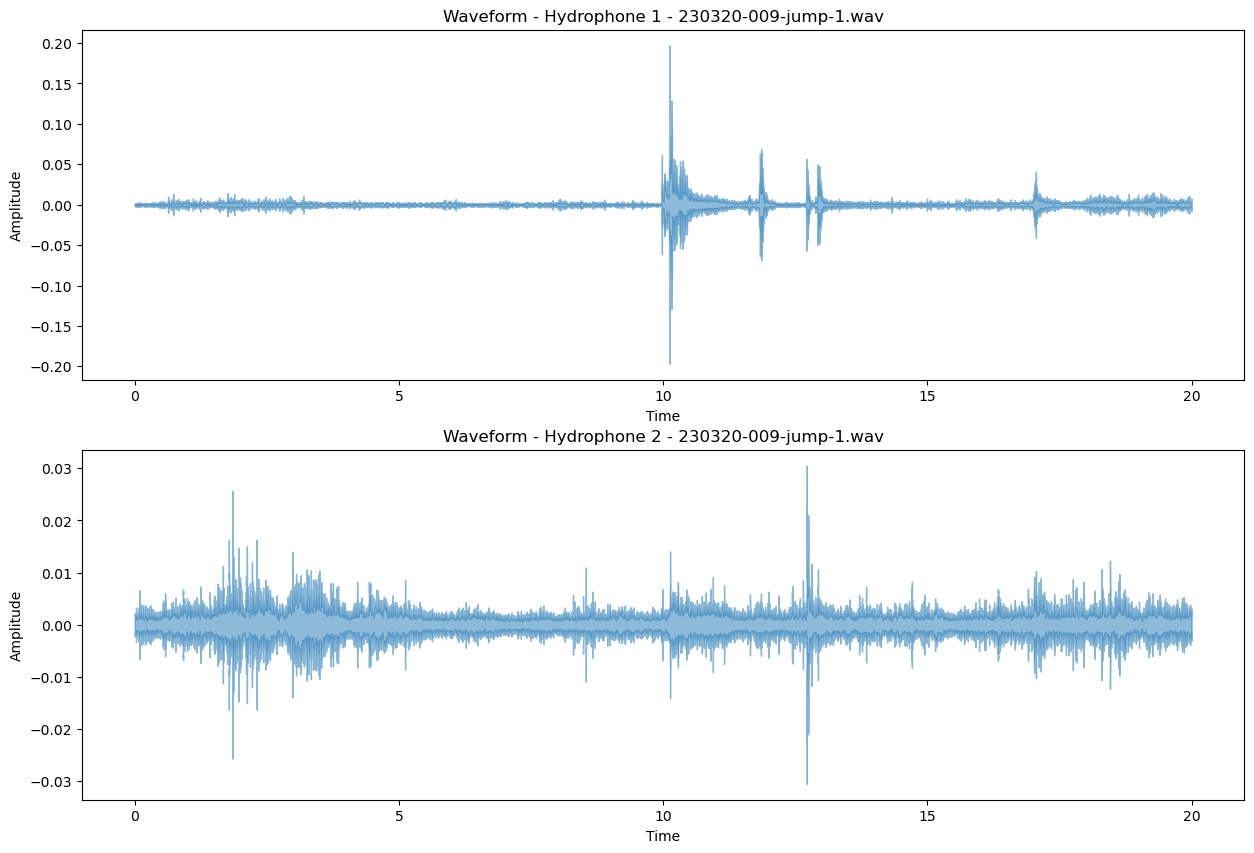

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
librosa.display.waveshow(audio[0], sr=sr, alpha=0.5)
plt.title(f'Waveform - Hydrophone 1 - {AUDIO_FILE}')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(audio[1], sr=sr, alpha=0.5)
plt.title(f'Waveform - Hydrophone 2 - {AUDIO_FILE}')
plt.ylabel('Amplitude')

plt.show()

In [5]:
NFFT = 1024
HOP_LENGTH = 512
TOP_DB = 80

spectrogram = librosa.stft(audio, n_fft=NFFT, hop_length=HOP_LENGTH)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), top_db=TOP_DB)

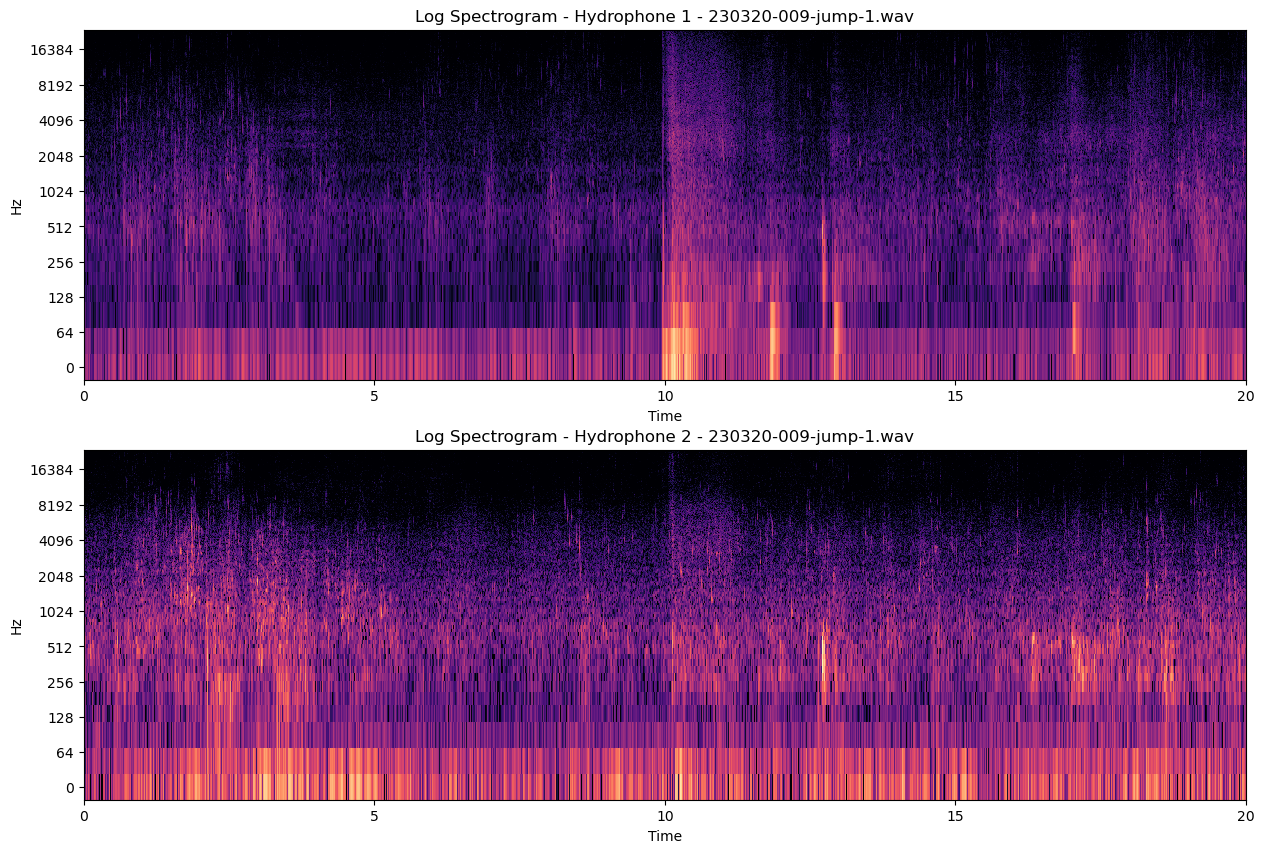

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
librosa.display.specshow(spectrogram_db[0], sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='log')
plt.title(f'Log Spectrogram - Hydrophone 1 - {AUDIO_FILE}')

plt.subplot(2, 1, 2)
librosa.display.specshow(spectrogram_db[1], sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='log')
plt.title(f'Log Spectrogram - Hydrophone 2 - {AUDIO_FILE}')

plt.show()

In [7]:
FRAME_SIZE = 2048
HOP_LENGTH = 1024
REFERENCE = 1

rms = librosa.feature.rms(y=audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)
spl = librosa.amplitude_to_db(rms, ref=REFERENCE).reshape(2, -1)

time = librosa.times_like(spl, sr=sr, hop_length=HOP_LENGTH)

In [8]:
spl[0].max()

-23.601618

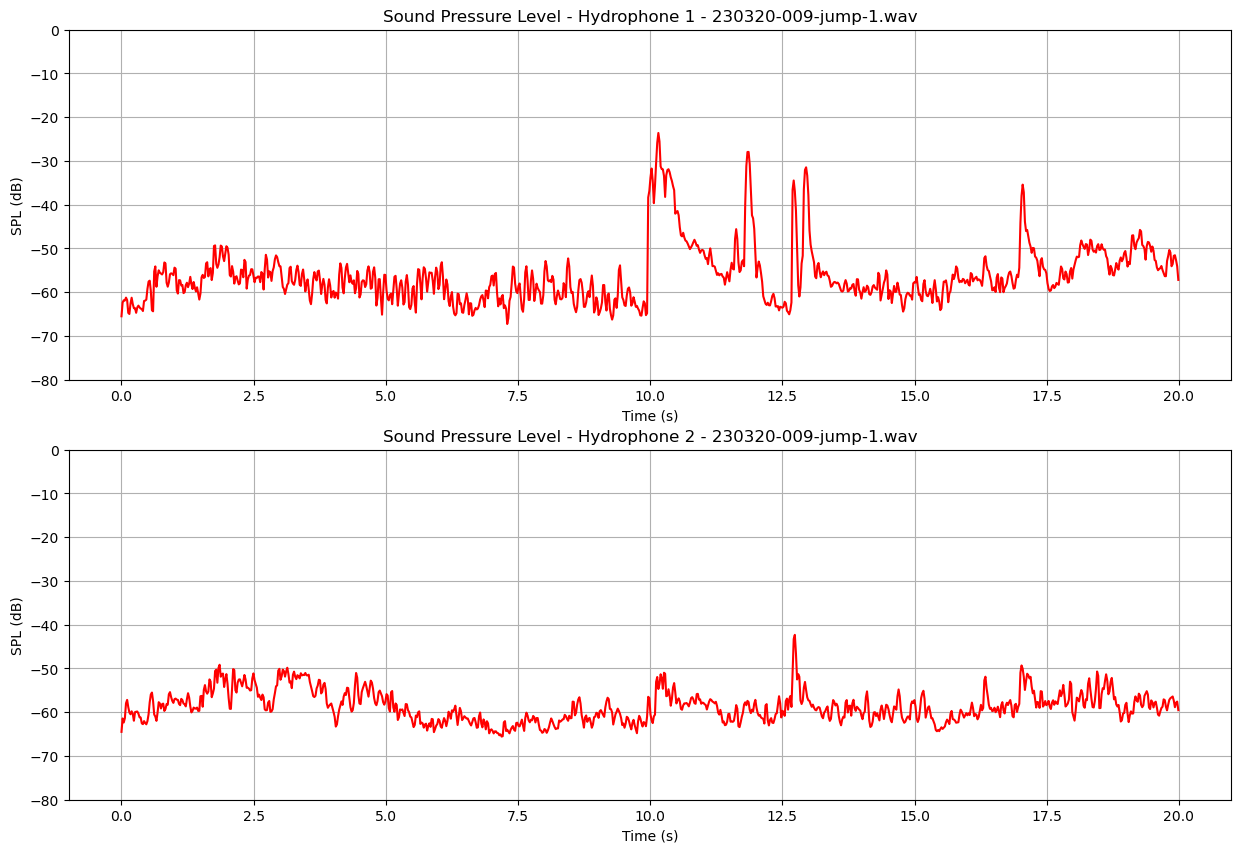

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(time, spl[0], color='red')
plt.title(f'Sound Pressure Level - Hydrophone 1 - {AUDIO_FILE}')
plt.xlabel('Time (s)')
plt.ylabel('SPL (dB)')
plt.ylim(-80, 0)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, spl[1], color='red')
plt.title(f'Sound Pressure Level - Hydrophone 2 - {AUDIO_FILE}')
plt.xlabel('Time (s)')
plt.ylabel('SPL (dB)')
plt.ylim(-80, 0)
plt.grid()

plt.show()